# Plotting with Plotly

We try to keep required imports within the snippet cells for easier use.

# Scatter plot

We use the hiris dataset below (note the data are imported in each cell snippet for ease of use)

In [1]:
import plotly.express as px
df = px.data.iris()
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1


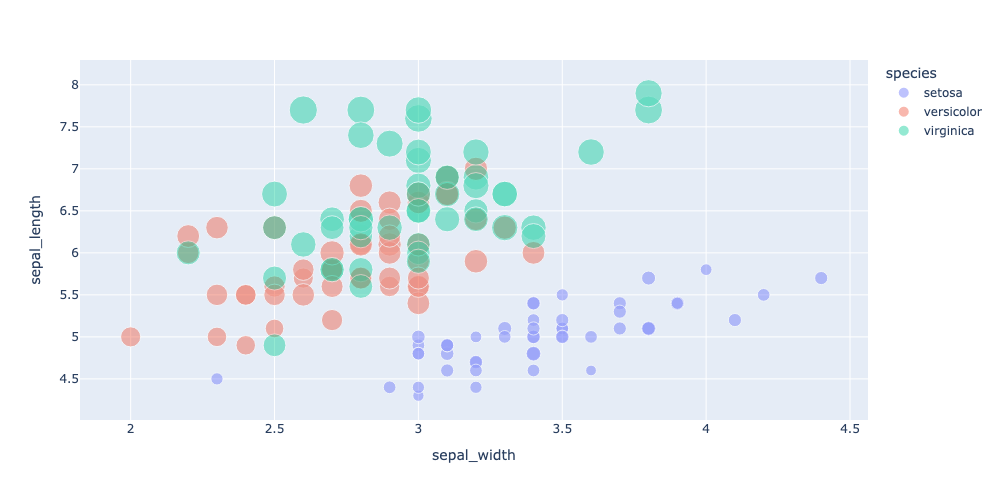

In [2]:
# Plotly express
# https://plotly.com/python/line-and-scatter/
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
# you can here do any update you want on figure
fig.update_traces(opacity=.6)

fig.show()
# plot as png for visualisation in github
fig.show('png', height=500, width=1000)

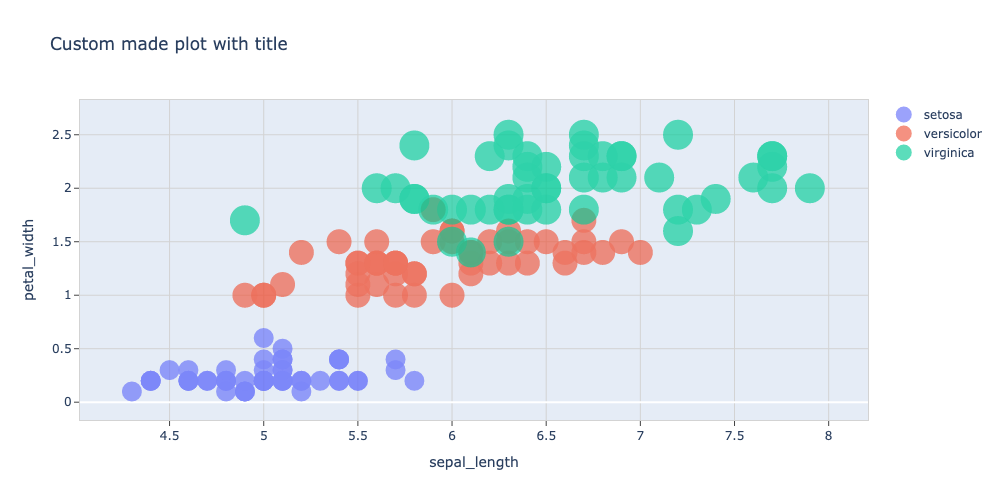

In [3]:
# https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
import plotly.subplots
import plotly.graph_objects as go

df = px.data.iris()
fig = plotly.subplots.make_subplots(rows=1, cols=1)

col_x, col_y = 'sepal_length', 'petal_width'
for ii,specie in enumerate(df['species'].unique()):
    marker = go.scatter.Marker(
        opacity=0.8, # color='#1f77b4', 
        size=5*ii + 20, # in pixels
        )
    df_plot = df[df['species']==specie]

    fig.add_trace( 
        go.Scatter( 
            x=df_plot[col_x],
            y=df_plot[col_y],
            customdata=df['petal_width'],
            opacity=0.8,
            name=specie, 
            mode='markers',
            hovertemplate = "(%{x:.1f}, %{y:.1f}) petal width: %{customdata}",
            marker = marker
        ), 
        # **position_args
    )
fig.update_layout(
    title_text="Custom made plot with title", showlegend=True, 
    xaxis_title=col_x, yaxis_title=col_y,
    paper_bgcolor='rgba(0,0,0,0)', # transparent background (also for exports to png. Does not make plot area transparent.
    # plot_bgcolor='rgba(0,200,200,200)' # personalise plot area color
)
axis_options = dict( mirror=True, ticks='outside', showline=True, linecolor='lightgrey', gridcolor='lightgrey')
fig.update_xaxes(**axis_options) 
fig.update_yaxes(**axis_options)
fig.show()
# plot as png for visualisation in github
fig.show('png', height=500, width=1000)
# write png
fig.write_image(f"./data/plotting-with-plotly/scatter-plot.png", scale=2.0, height=500, width=1000)


# Lines

Excellent doducmentation for both plotly.graphic_objext and express. https://plotly.com/python/line-charts/

In [4]:
px.data.gapminder().query("continent=='Oceania'").head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.12,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.33,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.93,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.10,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.93,13177000,16788.62948,AUS,36


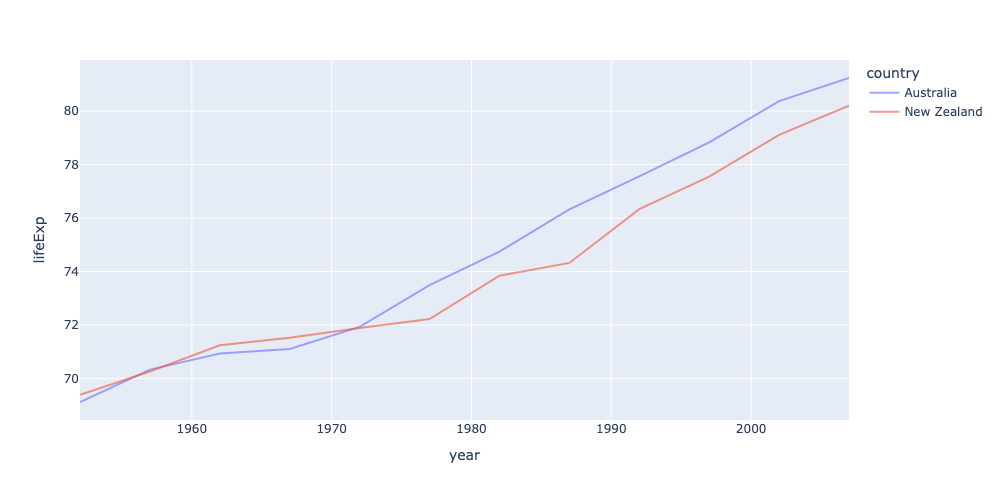

In [5]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")
fig = px.line(df, x="year", y="lifeExp", color='country', hover_data=df[['continent','pop']])

# you can here do any update you want on figure
fig.update_traces(opacity=.6)
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)')

fig.show()
# plot as png for visualisation in github
fig.show('png', height=500, width=1000)

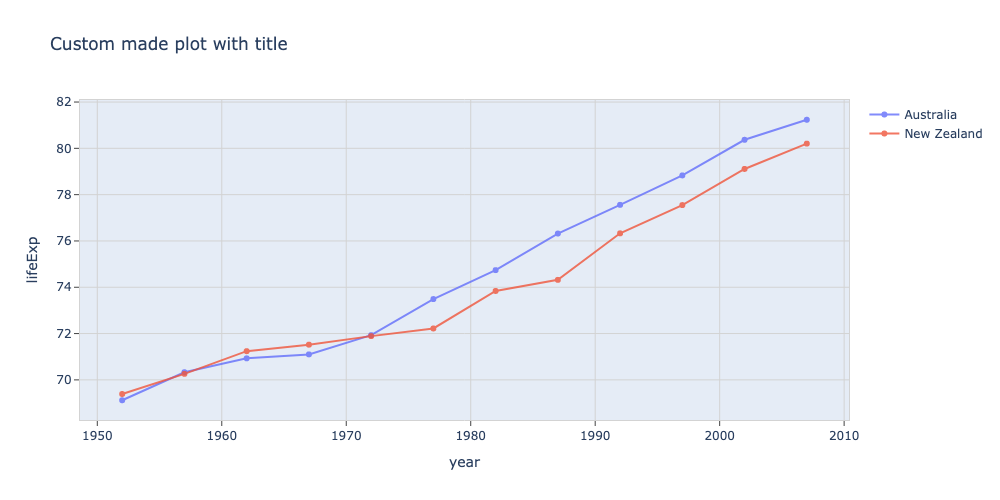

In [6]:
import plotly.subplots
import plotly.graph_objects as go

import plotly.express as px
df = px.data.gapminder().query("continent=='Oceania'")

fig = plotly.subplots.make_subplots(rows=1, cols=1)
col_x, col_y = "year", "lifeExp"
for country in df.country.unique():
    df_plot = df[df['country'] == country]
    fig.add_trace( 
        go.Scatter( 
            x=df_plot[col_x],
            y=df_plot[col_y],
            customdata=df_plot['country'],
            hovertemplate = "%{customdata}, %{x:.0f}: life exp.: %{y:.0f}",
            opacity=0.8, name=country, 
            mode='lines+markers',
            # mode='lines',
        ), 
    )

fig.update_layout(
    title_text="Custom made plot with title", showlegend=True, 
    xaxis_title=col_x, yaxis_title=col_y,
    paper_bgcolor='rgba(0,0,0,0)', # transparent background (also for exports to png. Does not make plot area transparent.
    # plot_bgcolor='rgba(0,200,200,200)' # personalise plot area color
)
axis_options = dict( mirror=True, ticks='outside', showline=True, linecolor='lightgrey', gridcolor='lightgrey')
fig.update_xaxes(**axis_options) 
fig.update_yaxes(**axis_options)
fig.show()
# plot as png for visualisation in github
fig.show('png', height=500, width=1000)
# write png
fig.write_image(f"./data/plotting-with-plotly/line-plot.png", scale=2.0, height=500, width=1000)


# Bar plot

In [7]:
import plotly.express as px

df = px.data.gapminder() #.query("continent=='Oceania'")
df = df.groupby('continent')['lifeExp'].agg('mean').reset_index()

col_x, col_y = 'lifeExp', 'continent'
px.bar(df, orientation='h', x=col_x, y=col_y, title='Life exp. by continent',hover_data=[col_x, col_y])

In [8]:
import plotly.express as px
import plotly.graph_objects as go

df = px.data.gapminder() #.query("continent=='Oceania'")
df = df.groupby('continent')['lifeExp'].agg('mean').reset_index()

col_x, col_y = 'lifeExp', 'continent'

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x = df[col_x],
        y = df[col_y],
        orientation='h',
        marker = dict(color='#123111', opacity=0.75),
        hovertemplate= '<br>%{y}: %{x:.2f}%<br>',
        name='', # sometimes plotly can through a "trace 0" when hovering, so best to overide trace name.
    )    
)
fig.update_layout(
    title='Avg life exp by continent',
    xaxis=dict(title=col_x),
    yaxis=dict(
        title=col_y,
        gridcolor='White',
        gridwidth=3,
    ),
    paper_bgcolor='rgb(0,0,0,0)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

# Vlines

In [9]:
import plotly.express as px
fig = px.scatter(x=[1,2,3,4], y=[2,3,4,2])
fig.add_vline(
    x=3, 
    line_color='#555555', 
    opacity=.6,
    line_width=20
)

# Subfigures
This I have not mastered yet.. an aproach is to put all figures in a list and show them sequentially. E.g. (using `plotly.express` for simplicity, but valid also for more complex plots):

In [10]:
import plotly.express as px
df = px.data.gapminder()

Continents = ['Oceania', 'Europe']
figs = []
for continent in Continents:
    figs.append(px.line(df.query(f"continent=='{continent}'"), x="year", y="lifeExp", color='country'))
    figs[-1].show()

# New plot template